# Install stan

In [ ]:
# Install cmdstanpy module
!pip install cmdstanpy

# Install arviz module (With version 2.33.1 you will need a special version of arviz)
!pip install git+https://github.com/OriolAbril/arviz.git@ci

# Install cmdstan -- Just for the first time!
from cmdstanpy import install_cmdstan
install_cmdstan(compiler=True)

!pip install --upgrade arviz
!pip install --upgrade cmdstanpy

  Cloning https://github.com/OriolAbril/arviz.git (to revision ci) to /tmp/pip-req-build-vrmm9z1h
  Running command git clone --filter=blob:none --quiet https://github.com/OriolAbril/arviz.git /tmp/pip-req-build-vrmm9z1h
  Running command git checkout -b ci --track origin/ci
  Switched to a new branch 'ci'
  Branch 'ci' set up to track remote branch 'ci' from 'origin'.
  Resolved https://github.com/OriolAbril/arviz.git to commit 7c20182c25b0b5e9af8242d1ee4d1185ae82b70a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for arviz: filename=arviz-0.17.0.dev0-py3-none-any.whl size=1651459 sha256=ff52bd3a2c54dfdc5b9ccf5660b4292aa6d2205baa687db8142ed3626dd0db0e
  Stored in directory: /tmp/pip-ephem-wheel-cache-b9z6zxae/wheels/46/1e/6c/46b9c646a79d4a0f01b37df1c2c0abcc4e7129fe66e88e9b0f
Successfully built arviz
  Attempting uninstall: arviz
    Found existing installation: arviz 0.15.1
    Unin

DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.34.1
Building version cmdstan-2.34.1, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Installed cmdstan-2.34.1
Test model compilation
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: arviz
    Found existing installation: arviz 0.17.0.dev0
    Uninstalling arviz-0.17.0.dev0:
      Successfully uninstalled arviz-0.17.0.dev0


In [ ]:
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import os

from cmdstanpy import CmdStanModel
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

# Create ./stan folder if does not exists
if not os.path.exists("/content/drive/My Drive/Bayesian/stan"):
    os.mkdir("/content/drive/My Drive/Bayesian/stan")

# Data preparation

In [ ]:
# Import data
data = pd.read_csv('/content/drive/My Drive/Bayesian/All_values.csv')
data.head(5)

,Unnamed: 0,Id_sensor,Time,NOx,max_wind10,avg_wind10,max_wind100,avg_wind100,max_humidity,avg_humidity,max_precipitation,avg_precipitation,max_temperature,avg_temperature,min_temperature,k_precipitation,k_wind10,type,area
0,5,10431,gennaio 16,90.291129,9.5,4.622043,14.5,5.798253,99,70.858871,2.3,0.074462,15.3,2.047177,-16.9,6,0,B,U
1,4,10431,febbraio 16,62.278818,11.5,4.549856,19.5,6.758333,100,77.343391,3.1,0.185345,18.2,5.297270,-10.4,10,0,B,U
2,9,10431,marzo 16,34.831855,9.4,4.192876,16.9,6.271371,99,70.580645,4.4,0.115188,15.8,6.238038,-8.1,5,0,B,U
3,2,10431,aprile 16,23.148058,10.1,4.116944,15.1,6.313611,100,80.711111,3.7,0.194722,20.4,11.736667,4.3,14,0,B,U
4,8,10431,maggio 16,16.024526,9.3,4.187097,13.7,6.336962,100,76.958333,2.8,0.199194,24.8,15.213710,7.4,11,0,B,U


In [ ]:
unique_values_count = data['Id_sensor'].nunique()

print(f'The number of unique values in the Id_sensor column is: {unique_values_count}')

The number of unique values in the Id_sensor column is: 88


For now, we only consider the LogNOx values for a sensor.

In [ ]:
filtered_data = data[data['Id_sensor'] == 10431]

# Extracting the 'Time' and 'NOx' columns for Id_sensor=10431
selected_columns = filtered_data[['Time', 'NOx']]

print(selected_columns)

            Time        NOx
0     gennaio 16  90.291129
1    febbraio 16  62.278818
2       marzo 16  34.831855
3      aprile 16  23.148058
4      maggio 16  16.024526
..           ...        ...
89     giugno 23  12.270515
90     luglio 23  12.084771
91     agosto 23  11.159024
92  settembre 23  14.230354
93    ottobre 23  21.808221

[94 rows x 2 columns]


In [ ]:
df_log = pd.DataFrame()
df_log['Time']=selected_columns['Time']
df_log['LogNOx'] = np.log10(selected_columns['NOx'])  # Log base 10

print(df_log)
df_log

            Time    LogNOx
0     gennaio 16  1.955645
1    febbraio 16  1.794340
2       marzo 16  1.541977
3      aprile 16  1.364515
4      maggio 16  1.204785
..           ...       ...
89     giugno 23  1.088863
90     luglio 23  1.082238
91     agosto 23  1.047626
92  settembre 23  1.153216
93    ottobre 23  1.338620

[94 rows x 2 columns]


,Time,LogNOx
0,gennaio 16,1.955645
1,febbraio 16,1.794340
2,marzo 16,1.541977
3,aprile 16,1.364515
4,maggio 16,1.204785
...,...,...
89,giugno 23,1.088863
90,luglio 23,1.082238
91,agosto 23,1.047626
92,settembre 23,1.153216


# First model
y --> N(mu(t), sigma) \\
sigma --> invgamma(3,2) \\

mu(t)=e if t<s \\
mu(t)=l if t>s \\

e --> N(0,1) \\
l--> N(0,1) \\
s--> U(1..T) \\

In [ ]:
change_point = """
functions {

    // Computes the marginal likelihood lpdf
    real marginal_likelihood_logpdf(array[] real obs, real early_rate, real late_rate,real sigma) {

        // Deduce size of data and uniform contribution
        int T = size(obs);
        real log_unif = -log(T);

        // Compute contributions for log_sum_exp
        vector[T] lp = rep_vector(log_unif, T);
        for (s in 1:T) {
            for (t in 1:T) {
                lp[s] += normal_lpdf(obs[t] | t < s ? early_rate : late_rate, sigma);
            }
        }

        // Return the value of the lpdf
        return log_sum_exp(lp);
    }
}

data {
    int<lower=1> T; //dimension of the time series
    array[T] real y; //array of y (observations of the number of disaster with mor ethan 10 death)
}

transformed data {
    real log_unif = -log(T);
}

parameters {
    real e;
    real l;
    real <lower=0.0001> sigma;
}

model {
    // Likelihood
    target += marginal_likelihood_logpdf(y, e, l, sigma);

    // Prior
    e ~ normal(0,1);
    l ~ normal(0,1);
    sigma ~ inv_gamma(3,2);

}
"""

# Write stan model to file
stan_file = "/content/drive/My Drive/Bayesian/stan/change_point.stan"
with open(stan_file, "w") as f:
    print(change_point, file=f)

# Compile stan model
change_point = CmdStanModel(stan_file=stan_file)

09:08:46 - cmdstanpy - INFO - compiling stan file /tmp/tmp45dlcn6m/tmp_fsyckc8.stan to exe file /content/drive/My Drive/Bayesian/stan/change_point
INFO:cmdstanpy:compiling stan file /tmp/tmp45dlcn6m/tmp_fsyckc8.stan to exe file /content/drive/My Drive/Bayesian/stan/change_point
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=change_point.stan /tmp/tmp45dlcn6m/tmp_fsyckc8
cwd: /root/.cmdstan/cmdstan-2.34.1
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=change_point.stan --o=/tmp/tmp45dlcn6m/tmp_fsyckc8.hpp /tmp/tmp45dlcn6m/tmp_fsyckc8.stan

--- Compiling C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.81.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/l

In [ ]:
df_log.shape[0]

94

In [ ]:
# Input data
cpc_data = {
    "T": df_log.shape[0],
    "y": df_log.LogNOx,
    "r_e": 1.0,
    "r_l": 1.0
}

# Algorithm parameters
algo_params = {
    "n_chains": 4,
    "n_burnin": 1000,
    "n_iter": 5000
}

# Sample
cpc_fit = change_point.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                  iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/change_point info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvic3ra8y/2wxxbx1h.json
09:09:23 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/change_point', 'id=1', 'random', 'seed=28408', 'data', 'file=/tmp/tmpvic3ra8y/2wxxbx1h.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointukszmodv/change_point-20240205090923_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/change_point', 'id=2', 'random', 'seed=28408', 'data', 'file=/tmp/tmpvic3ra8y/2wxxbx1h.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointukszmodv/change_point-20240205090923_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/change_point', 'id=3',

09:13:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/change_point', 'id=1', 'random', 'seed=28408', 'data', 'file=/tmp/tmpvic3ra8y/2wxxbx1h.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointukszmodv/change_point-20240205090923_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpvic3ra8y/change_pointukszmodv/change_point-20240205090923_1.csv
 console_msgs (if any):
	/tmp/tmpvic3ra8y/change_pointukszmodv/change_point-20240205090923_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0

In [ ]:
# Convert to arviz data type
chains = az.from_cmdstanpy(cpc_fit)

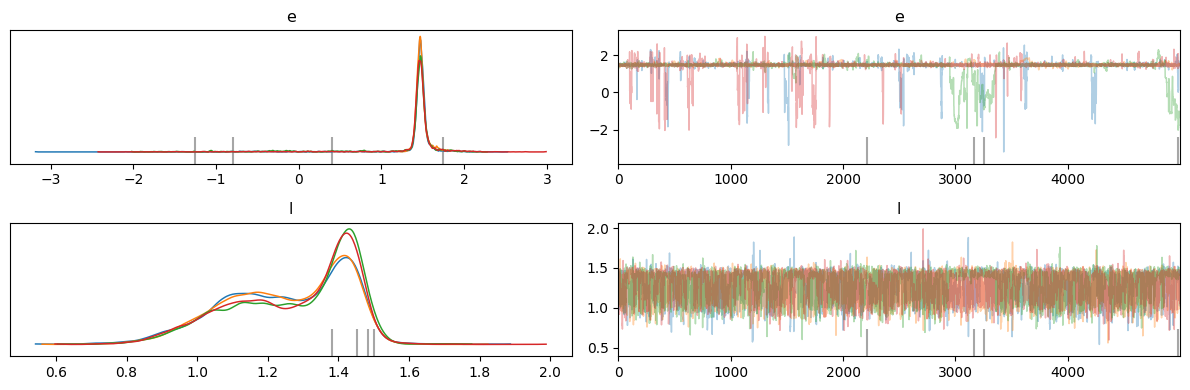

In [ ]:
# Traceplots
az.plot_trace(chains, var_names=["e", "l"], compact=False)
plt.tight_layout()
plt.show()

In [ ]:
# Summary of the MCMC run
az.summary(chains)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
e,1.397,0.426,1.134,2.008,0.032,0.023,869.0,133.0,1.02
l,1.263,0.173,0.947,1.508,0.005,0.003,1235.0,8764.0,1.01
sigma,0.332,0.025,0.284,0.378,0.000,0.000,6417.0,7118.0,1.00


In [ ]:
change_point = """
functions {

    // Computes vector of lp
    vector compute_logp(array[] real obs, real early_rate, real late_rate, real sigma){

        // Deduce size of data and uniform contribution
        int T = size(obs);
        real log_unif = -log(T);

        // Compute contributions vector and return
        vector[T] lp = rep_vector(log_unif, T);
        for (s in 1:T) {
            for (t in 1:T) {
                lp[s] += normal_lpdf(obs[t] | t < s ? early_rate : late_rate, sigma);
            }
        }
        return lp;

    }

    // Computes the vector of probabilites for the posterior distribution of s
    vector compute_probs(vector lp) {
        return softmax(lp);
    }

    // Computes the marginal likelihood lpdf
    real marginal_likelihood_logpdf(vector lp){
        return log_sum_exp(lp);
    }

}

data {
    int<lower=1> T; //dimension of the time series
    array[T] real y; //array of y (observations of the number of disaster with mor ethan 10 death)
}

transformed data {
    real log_unif = -log(T);
}

parameters {
    real e;
    real l;
    real <lower=0.0001> sigma;
}

model {
    // Likelihood
    target += marginal_likelihood_logpdf(compute_logp(y, e, l, sigma));

    // Prior
    e ~ normal(0,1);
    l ~ normal(0,1);
    sigma ~ inv_gamma(3,2);

}

generated quantities {
    int<lower=1, upper=T> s = categorical_rng(compute_probs(compute_logp(y,e,l, sigma)));
}
"""

# Write stan model to file
stan_file = "/content/drive/My Drive/Bayesian/stan/change_point.stan"
with open(stan_file, "w") as f:
    print(change_point, file=f)

# Compile stan model
change_point = CmdStanModel(stan_file=stan_file)

09:25:17 - cmdstanpy - INFO - compiling stan file /tmp/tmphf0uh2di/tmptm8feu0f.stan to exe file /content/drive/My Drive/Bayesian/stan/change_point
INFO:cmdstanpy:compiling stan file /tmp/tmphf0uh2di/tmptm8feu0f.stan to exe file /content/drive/My Drive/Bayesian/stan/change_point
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=change_point.stan /tmp/tmphf0uh2di/tmptm8feu0f
cwd: /root/.cmdstan/cmdstan-2.34.1
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=change_point.stan --o=/tmp/tmphf0uh2di/tmptm8feu0f.hpp /tmp/tmphf0uh2di/tmptm8feu0f.stan

--- Compiling C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.81.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/l

In [ ]:
# Input data
cpc_data = {
    "T": df_log.shape[0],
    "y": df_log.LogNOx,
    "r_e": 1.0,
    "r_l": 1.0
}

# Algorithm parameters
algo_params = {
    "n_chains": 4,
    "n_burnin": 1000,
    "n_iter": 5000
}

# Sample
cpc_fit = change_point.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                  iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/change_point info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvic3ra8y/d9r00f2f.json
09:25:59 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/change_point', 'id=1', 'random', 'seed=85777', 'data', 'file=/tmp/tmpvic3ra8y/d9r00f2f.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointrdp4i3fi/change_point-20240205092600_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/change_point', 'id=2', 'random', 'seed=85777', 'data', 'file=/tmp/tmpvic3ra8y/d9r00f2f.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointrdp4i3fi/change_point-20240205092600_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/change_point', 'id=3',

09:29:07 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/change_point', 'id=1', 'random', 'seed=85777', 'data', 'file=/tmp/tmpvic3ra8y/d9r00f2f.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointrdp4i3fi/change_point-20240205092600_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpvic3ra8y/change_pointrdp4i3fi/change_point-20240205092600_1.csv
 console_msgs (if any):
	/tmp/tmpvic3ra8y/change_pointrdp4i3fi/change_point-20240205092600_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0

09:29:08 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 3 divergent transitions (0.1%)
	Chain 3 had 31 divergent transitions (0.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 2 had 3 divergent transitions (0.1%)
	Chain 3 had 31 divergent transitions (0.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


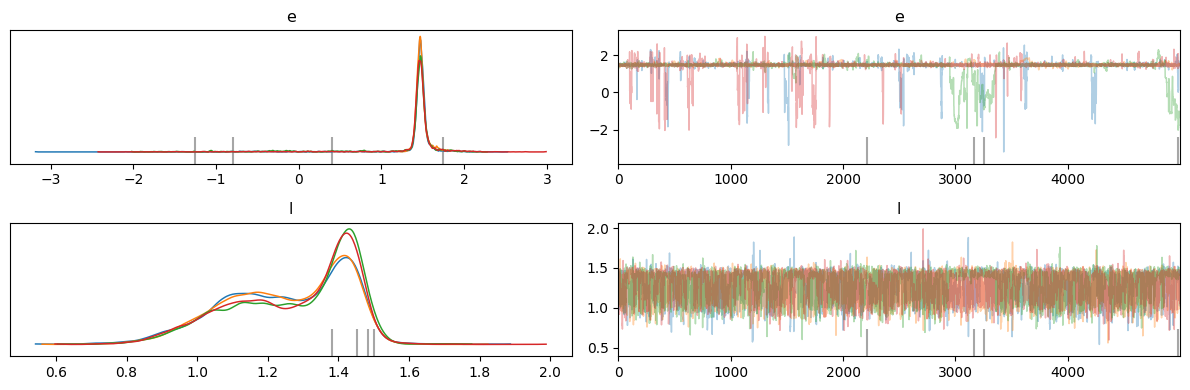

In [ ]:
# Traceplots for early and late rates
az.plot_trace(chains, var_names=["e", "l"], compact=False)
plt.tight_layout()
plt.show()

In [ ]:
# Posterior distribution of s
# Convert to arviz data type
chains = az.InferenceData(posterior=cpc_fit.draws_xr())
s_chain = np.hstack(chains.posterior.s).astype(int)

# Posterior barplot for s
x, y = np.unique(s_chain, return_counts=True)


In [ ]:
print("Posterior Mode: {0}".format(df_log.Time[x[y == y.max()]].to_numpy().squeeze()))

Posterior Mode: febbraio 16


# first model, splitted series

In [ ]:

# Find the indexes corresponding to 'gennaio 21'
index_gennaio_21 = df_log[df_log['Time'] == 'gennaio 21'].index[0]

# Create two DataFrames based on indexes
df_subset_1 = df_log.loc[:index_gennaio_21]
df_subset_2 = df_log.loc[index_gennaio_21:]

# Print or use the subsets as needed
print("Subset 1:")
print(df_subset_1.head())

print("\nSubset 2:")
print(df_subset_2.head())


Subset 1:
          Time    LogNOx
0   gennaio 16  1.955645
1  febbraio 16  1.794340
2     marzo 16  1.541977
3    aprile 16  1.364515
4    maggio 16  1.204785

Subset 2:
           Time    LogNOx
60   gennaio 21  1.877066
61  febbraio 21  1.679537
62     marzo 21  1.433254
63    aprile 21  1.295748
64    maggio 21  1.199688
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    61 non-null     object 
 1   LogNOx  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
change_point = """
functions {

    // Computes the marginal likelihood lpdf
    real marginal_likelihood_logpdf(array[] real obs, real early_rate, real late_rate,real sigma) {

        // Deduce size of data and uniform contribution
        int T = size(obs);
        real log_unif = -log(T);

        // Compute contributions for log_sum_exp
        vector[T] lp = rep_vector(log_unif, T);
        for (s in 1:T) {
            for (t in 1:T) {
                lp[s] += normal_lpdf(obs[t] | t < s ? early_rate : late_rate, sigma);
            }
        }

        // Return the value of the lpdf
        return log_sum_exp(lp);
    }
}

data {
    int<lower=1> T; //dimension of the time series
    array[T] real y; //array of y (observations of the number of disaster with mor ethan 10 death)
}

transformed data {
    real log_unif = -log(T);
}

parameters {
    real e;
    real l;
    real <lower=0.0001> sigma;
}

model {
    // Likelihood
    target += marginal_likelihood_logpdf(y, e, l, sigma);

    // Prior
    e ~ normal(0,1);
    l ~ normal(0,1);
    sigma ~ inv_gamma(3,2);

}
"""

# Write stan model to file
stan_file = "/content/drive/My Drive/Bayesian/stan/change_point.stan"
with open(stan_file, "w") as f:
    print(change_point, file=f)

# Compile stan model
change_point = CmdStanModel(stan_file=stan_file)

09:43:49 - cmdstanpy - INFO - compiling stan file /tmp/tmpggvs4r7d/tmp79z696ia.stan to exe file /content/drive/My Drive/Bayesian/stan/change_point
INFO:cmdstanpy:compiling stan file /tmp/tmpggvs4r7d/tmp79z696ia.stan to exe file /content/drive/My Drive/Bayesian/stan/change_point
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=change_point.stan /tmp/tmpggvs4r7d/tmp79z696ia
cwd: /root/.cmdstan/cmdstan-2.34.1
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=change_point.stan --o=/tmp/tmpggvs4r7d/tmp79z696ia.hpp /tmp/tmpggvs4r7d/tmp79z696ia.stan

--- Compiling C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.81.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/l

In [ ]:
# Input data
cpc_data = {
    "T": df_subset_1.shape[0],
    "y": df_subset_1.LogNOx,
    "r_e": 1.0,
    "r_l": 1.0
}

# Algorithm parameters
algo_params = {
    "n_chains": 4,
    "n_burnin": 1000,
    "n_iter": 5000
}

# Sample
cpc_fit = change_point.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                  iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/change_point info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvic3ra8y/49jz9ds6.json
09:44:25 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/change_point', 'id=2', 'random', 'seed=86564', 'data', 'file=/tmp/tmpvic3ra8y/49jz9ds6.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointhk8zffq3/change_point-20240205094425_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/change_point', 'id=4', 'random', 'seed=86564', 'data', 'file=/tmp/tmpvic3ra8y/49jz9ds6.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointhk8zffq3/change_point-20240205094425_4.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/

09:46:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/change_point', 'id=1', 'random', 'seed=86564', 'data', 'file=/tmp/tmpvic3ra8y/49jz9ds6.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointhk8zffq3/change_point-20240205094425_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpvic3ra8y/change_pointhk8zffq3/change_point-20240205094425_1.csv
 console_msgs (if any):
	/tmp/tmpvic3ra8y/change_pointhk8zffq3/change_point-20240205094425_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0

In [ ]:
# Convert to arviz data type
chains = az.from_cmdstanpy(cpc_fit)

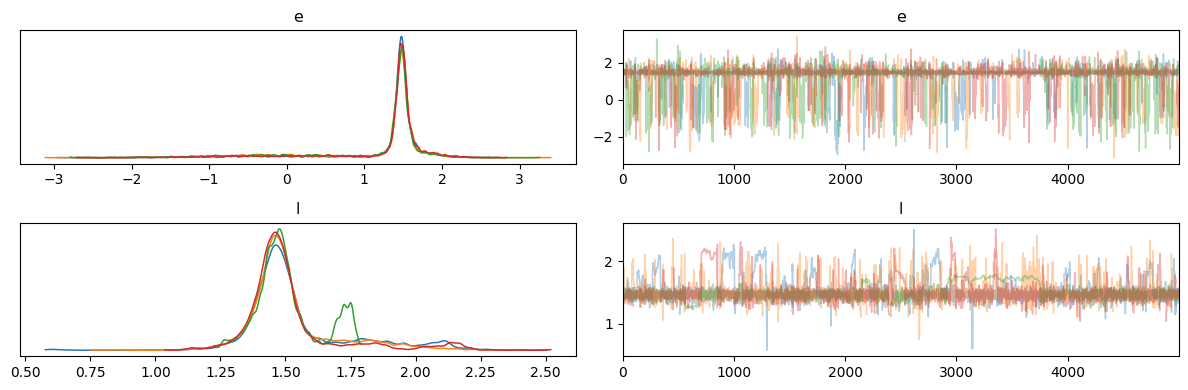

In [ ]:
# Traceplots
az.plot_trace(chains, var_names=["e", "l"], compact=False)
plt.tight_layout()
plt.show()

In [ ]:
# Summary of the MCMC run
az.summary(chains)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
e,1.218,0.746,-0.702,2.051,0.022,0.016,2097.0,2230.0,1.01
l,1.518,0.173,1.250,1.898,0.010,0.007,326.0,378.0,1.02
sigma,0.354,0.033,0.296,0.420,0.001,0.001,1781.0,3680.0,1.00


In [ ]:
change_point = """
functions {

    // Computes vector of lp
    vector compute_logp(array[] real obs, real early_rate, real late_rate, real sigma){

        // Deduce size of data and uniform contribution
        int T = size(obs);
        real log_unif = -log(T);

        // Compute contributions vector and return
        vector[T] lp = rep_vector(log_unif, T);
        for (s in 1:T) {
            for (t in 1:T) {
                lp[s] += normal_lpdf(obs[t] | t < s ? early_rate : late_rate, sigma);
            }
        }
        return lp;

    }

    // Computes the vector of probabilites for the posterior distribution of s
    vector compute_probs(vector lp) {
        return softmax(lp);
    }

    // Computes the marginal likelihood lpdf
    real marginal_likelihood_logpdf(vector lp){
        return log_sum_exp(lp);
    }

}

data {
    int<lower=1> T; //dimension of the time series
    array[T] real y; //array of y (observations of the number of disaster with mor ethan 10 death)
}

transformed data {
    real log_unif = -log(T);
}

parameters {
    real e;
    real l;
    real <lower=0.0001> sigma;
}

model {
    // Likelihood
    target += marginal_likelihood_logpdf(compute_logp(y, e, l, sigma));

    // Prior
    e ~ normal(0,1);
    l ~ normal(0,1);
    sigma ~ inv_gamma(3,2);

}

generated quantities {
    int<lower=1, upper=T> s = categorical_rng(compute_probs(compute_logp(y,e,l, sigma)));
}
"""

# Write stan model to file
stan_file = "/content/drive/My Drive/Bayesian/stan/change_point.stan"
with open(stan_file, "w") as f:
    print(change_point, file=f)

# Compile stan model
change_point = CmdStanModel(stan_file=stan_file)

09:46:23 - cmdstanpy - INFO - compiling stan file /tmp/tmpal4dcz4w/tmpfg735qya.stan to exe file /content/drive/My Drive/Bayesian/stan/change_point
INFO:cmdstanpy:compiling stan file /tmp/tmpal4dcz4w/tmpfg735qya.stan to exe file /content/drive/My Drive/Bayesian/stan/change_point
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=change_point.stan /tmp/tmpal4dcz4w/tmpfg735qya
cwd: /root/.cmdstan/cmdstan-2.34.1
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=change_point.stan --o=/tmp/tmpal4dcz4w/tmpfg735qya.hpp /tmp/tmpal4dcz4w/tmpfg735qya.stan

--- Compiling C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.81.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/l

In [ ]:
# Input data
cpc_data = {
    "T": df_subset_1.shape[0],
    "y": df_subset_1.LogNOx,
    "r_e": 1.0,
    "r_l": 1.0
}

# Algorithm parameters
algo_params = {
    "n_chains": 4,
    "n_burnin": 1000,
    "n_iter": 5000
}

# Sample
cpc_fit = change_point.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                  iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/change_point info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvic3ra8y/ygwgonge.json
09:46:55 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/change_point', 'id=1', 'random', 'seed=80656', 'data', 'file=/tmp/tmpvic3ra8y/ygwgonge.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointh95b14tx/change_point-20240205094655_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/change_point', 'id=3', 'random', 'seed=80656', 'data', 'file=/tmp/tmpvic3ra8y/ygwgonge.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointh95b14tx/change_point-20240205094655_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/

09:48:36 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/change_point', 'id=1', 'random', 'seed=80656', 'data', 'file=/tmp/tmpvic3ra8y/ygwgonge.json', 'output', 'file=/tmp/tmpvic3ra8y/change_pointh95b14tx/change_point-20240205094655_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpvic3ra8y/change_pointh95b14tx/change_point-20240205094655_1.csv
 console_msgs (if any):
	/tmp/tmpvic3ra8y/change_pointh95b14tx/change_point-20240205094655_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0

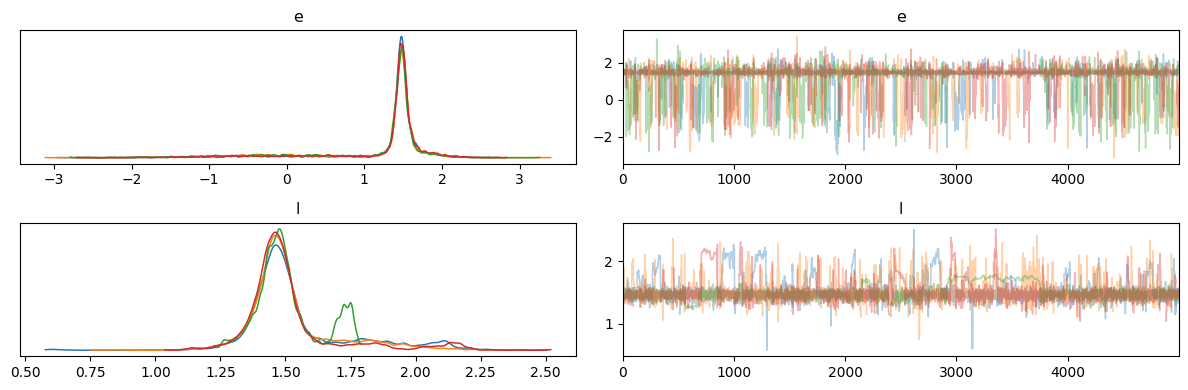

In [ ]:
# Traceplots for early and late rates
az.plot_trace(chains, var_names=["e", "l"], compact=False)
plt.tight_layout()
plt.show()

In [ ]:
# Posterior distribution of s
# Convert to arviz data type
chains = az.InferenceData(posterior=cpc_fit.draws_xr())
s_chain = np.hstack(chains.posterior.s).astype(int)

# Posterior barplot for s
x, y = np.unique(s_chain, return_counts=True)


In [ ]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [ ]:
y

array([4396,  675,  767,  576,  367,  243,  222,  214,  253,  312,  262,
        183,  163,  174,  205,  212,  204,  154,  139,  121,  111,  126,
        129,  136,  146,  210,  253,  322,  240,  175,  146,  115,  146,
        119,  149,  141,  152,  159,  221,  179,  209,  183,  154,  151,
        185,  190,  185,  164,  181,  220,  275,  301,  232,  225,  288,
        344,  496,  713,  830,  701,  556])

In [ ]:
print("Posterior Mode: {0}".format(df_subset_1.Time[x[y == y.max()]].to_numpy().squeeze()))

Posterior Mode: febbraio 16


# Second model


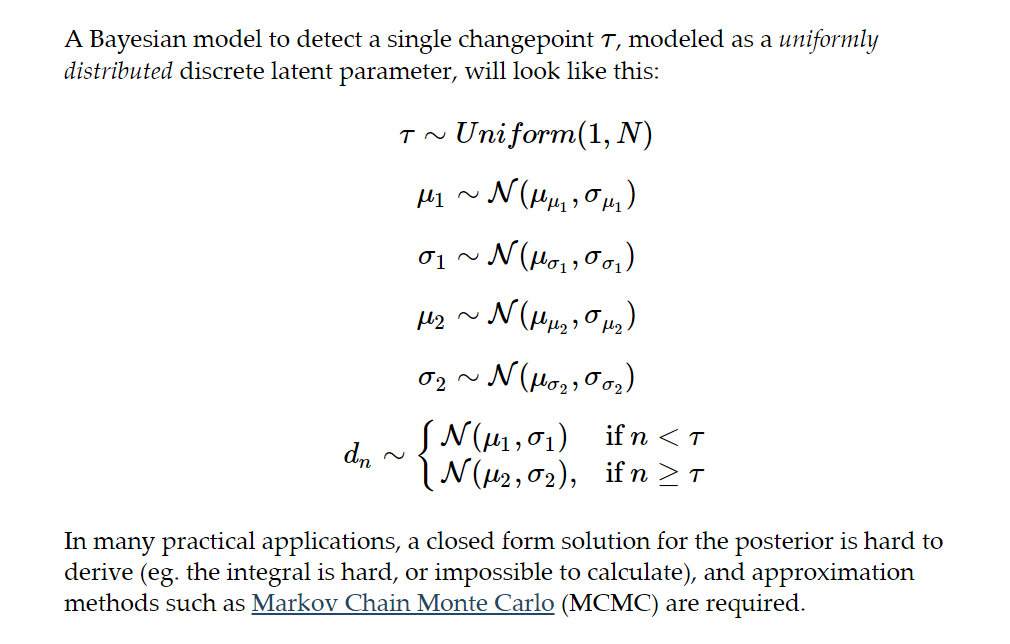

In [ ]:
cp3 = """
data {
    int<lower=1> N;
    array[N] real D; //this is modified wrt the source code
}


// stan operates on log scale
transformed data {
    real log_unif;
    log_unif = -log(N);
}

parameters {
    real mu1;
    real mu2;

    real<lower=0> sigma1;
    real<lower=0> sigma2;
}


// Marginalize out tau and
// calculate log_p(D | mu1, sd1, mu2, sd2)
// TODO: we can make this linear via dynamic programming
transformed parameters {
      vector[N] log_p;
      real mu;
      real sigma;
      log_p = rep_vector(log_unif, N);
      for (tau in 1:N)
        for (i in 1:N) {
          mu = i < tau ? mu1 : mu2;
          sigma = i < tau ? sigma1 : sigma2;
          log_p[tau] = log_p[tau] + normal_lpdf(D[i] | mu, sigma);
      }
}


model {
    mu1 ~ normal(0, 100);
    mu2 ~ normal(0, 100);

    // scale parameters need to be > 0;
    // we constrained sigma1, sigma2 to be positive
    // so that stan interprets the following as half-normal priors
    sigma1 ~ normal(0, 100);
    sigma2 ~ normal(0, 100);

    target += log_sum_exp(log_p);
}

//Draw the discrete parameter tau. This is highly inefficient
generated quantities {
    int<lower=1,upper=N> tau;
    tau = categorical_rng(softmax(log_p));
}
"""
# Write stan model to file
stan_file = "/content/drive/My Drive/Bayesian/stan/cp3.stan"
with open(stan_file, "w") as f:
    print(cp3, file=f)

# Compile stan model
cp3 = CmdStanModel(stan_file=stan_file)

07:45:16 - cmdstanpy - INFO - compiling stan file /tmp/tmp899a12j4/tmpj0k4gdua.stan to exe file /content/drive/My Drive/Bayesian/stan/cp3
INFO:cmdstanpy:compiling stan file /tmp/tmp899a12j4/tmpj0k4gdua.stan to exe file /content/drive/My Drive/Bayesian/stan/cp3
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=cp3.stan /tmp/tmp899a12j4/tmpj0k4gdua
cwd: /root/.cmdstan/cmdstan-2.34.1
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=cp3.stan --o=/tmp/tmp899a12j4/tmpj0k4gdua.hpp /tmp/tmp899a12j4/tmpj0k4gdua.stan

--- Compiling C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.81.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/

In [ ]:
# Input data
cpc_data = {
    "N": df_log.shape[0],
    "D": df_log.LogNOx,
}

# Algorithm parameters
algo_params = {
    "n_chains": 4,
    "n_burnin": 1000,
    "n_iter": 5000
}

# Sample
cpc_fit = cp3.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                  iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])

# Convert to arviz data type
chains = az.from_cmdstanpy(cpc_fit)

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/cp3 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvic3ra8y/ad144ecf.json
07:40:06 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/cp3', 'id=1', 'random', 'seed=56475', 'data', 'file=/tmp/tmpvic3ra8y/ad144ecf.json', 'output', 'file=/tmp/tmpvic3ra8y/cp3qf18pftp/cp3-20240205074006_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/cp3', 'id=3', 'random', 'seed=56475', 'data', 'file=/tmp/tmpvic3ra8y/ad144ecf.json', 'output', 'file=/tmp/tmpvic3ra8y/cp3qf18pftp/cp3-20240205074006_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/cp3', 'id=2', 'random', 'seed=56475', 'data', 'file=/t

07:43:44 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/cp3', 'id=1', 'random', 'seed=56475', 'data', 'file=/tmp/tmpvic3ra8y/ad144ecf.json', 'output', 'file=/tmp/tmpvic3ra8y/cp3qf18pftp/cp3-20240205074006_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpvic3ra8y/cp3qf18pftp/cp3-20240205074006_1.csv
 console_msgs (if any):
	/tmp/tmpvic3ra8y/cp3qf18pftp/cp3-20240205074006_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
      kappa = 0.75 (D

07:43:44 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.0%)
	Chain 2 had 6 divergent transitions (0.1%)
	Chain 4 had 200 divergent transitions (4.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 1 had 1 divergent transitions (0.0%)
	Chain 2 had 6 divergent transitions (0.1%)
	Chain 4 had 200 divergent transitions (4.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [ ]:
# Posterior distribution of s
s_chain = np.hstack(chains.posterior.tau).astype(int)

# Posterior barplot for s
x, y = np.unique(s_chain, return_counts=True)

In [ ]:
print("Posterior Mode: {0}".format(df_log.Time[x[y == y.max()]].to_numpy().squeeze()))

Posterior Mode: febbraio 16


In [ ]:
cp3 = """
data {
    int<lower=1> N;
    array[N] real D; //this is modified wrt the source code
}


// stan operates on log scale
transformed data {
    real log_unif;
    log_unif = log(N);
}

parameters {
    real mu1;
    real mu2;

    real<lower=0> sigma1;
    real<lower=0> sigma2;
}


// Marginalize out tau and
// calculate log_p(D | mu1, sd1, mu2, sd2)
// TODO: we can make this linear via dynamic programming
transformed parameters {
      vector[N] log_p;
      real mu;
      real sigma;
      log_p = rep_vector(log_unif, N);
      for (tau in 1:N)
        for (i in 1:N) {
          mu = i < tau ? mu1 : mu2;
          sigma = i < tau ? sigma1 : sigma2;
          log_p[tau] = log_p[tau] + normal_lpdf(D[i] | mu, sigma);
      }
}


model {
    mu1 ~ normal(0, 100);
    mu2 ~ normal(0, 100);

    // scale parameters need to be > 0;
    // we constrained sigma1, sigma2 to be positive
    // so that stan interprets the following as half-normal priors
    sigma1 ~ normal(0, 100);
    sigma2 ~ normal(0, 100);

    target += log_sum_exp(log_p);
}

//Draw the discrete parameter tau. This is highly inefficient
generated quantities {
    int<lower=1,upper=N> tau;
    tau = categorical_rng(softmax(log_p));
}
"""
# Write stan model to file
stan_file = "/content/drive/My Drive/Bayesian/stan/cp3.stan"
with open(stan_file, "w") as f:
    print(cp3, file=f)

# Compile stan model
cp3 = CmdStanModel(stan_file=stan_file)

07:47:16 - cmdstanpy - INFO - compiling stan file /tmp/tmp4k7hnnok/tmps0khw4y1.stan to exe file /content/drive/My Drive/Bayesian/stan/cp3
INFO:cmdstanpy:compiling stan file /tmp/tmp4k7hnnok/tmps0khw4y1.stan to exe file /content/drive/My Drive/Bayesian/stan/cp3
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=cp3.stan /tmp/tmp4k7hnnok/tmps0khw4y1
cwd: /root/.cmdstan/cmdstan-2.34.1
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=cp3.stan --o=/tmp/tmp4k7hnnok/tmps0khw4y1.hpp /tmp/tmp4k7hnnok/tmps0khw4y1.stan

--- Compiling C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.81.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/

In [ ]:
# Input data
cpc_data = {
    "N": df_log.shape[0],
    "D": df_log.LogNOx,
}

# Algorithm parameters
algo_params = {
    "n_chains": 4,
    "n_burnin": 1000,
    "n_iter": 5000
}

# Sample
cpc_fit = cp3.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                  iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])

# Convert to arviz data type
chains = az.from_cmdstanpy(cpc_fit)

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/cp3 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvic3ra8y/ckdv_nww.json
07:47:54 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/cp3', 'id=1', 'random', 'seed=49272', 'data', 'file=/tmp/tmpvic3ra8y/ckdv_nww.json', 'output', 'file=/tmp/tmpvic3ra8y/cp36sw5fs34/cp3-20240205074754_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/cp3', 'id=2', 'random', 'seed=49272', 'data', 'file=/tmp/tmpvic3ra8y/ckdv_nww.json', 'output', 'file=/tmp/tmpvic3ra8y/cp36sw5fs34/cp3-20240205074754_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/cp3', 'id=3', 'random', 'seed=49272', 'data', 'file=/tmp/tmpvic3ra8y/ckdv_nw

07:50:50 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/cp3', 'id=1', 'random', 'seed=49272', 'data', 'file=/tmp/tmpvic3ra8y/ckdv_nww.json', 'output', 'file=/tmp/tmpvic3ra8y/cp36sw5fs34/cp3-20240205074754_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpvic3ra8y/cp36sw5fs34/cp3-20240205074754_1.csv
 console_msgs (if any):
	/tmp/tmpvic3ra8y/cp36sw5fs34/cp3-20240205074754_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
      kappa = 0.75 (D

07:50:50 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2 divergent transitions (0.0%)
	Chain 2 had 3 divergent transitions (0.1%)
	Chain 4 had 294 divergent transitions (5.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 1 had 2 divergent transitions (0.0%)
	Chain 2 had 3 divergent transitions (0.1%)
	Chain 4 had 294 divergent transitions (5.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [ ]:
# Posterior distribution of s
s_chain = np.hstack(chains.posterior.tau).astype(int)

# Posterior barplot for s
x, y = np.unique(s_chain, return_counts=True)

In [ ]:
print("Posterior Mode: {0}".format(df_log.Time[x[y == y.max()]].to_numpy().squeeze()))

Posterior Mode: febbraio 16
